In [2]:
import healpy as hp, numpy as np, sys, prjlib
from matplotlib.pyplot import *

In [3]:
Mla, __ = prjlib.window('la',nside=512,ascale=0)
Msa, __ = prjlib.window('sa',nside=512,ascale=0)

/global/homes/t/toshiyan/.local/lib/python3.7/site-packages/healpy/fitsfunc.py:369: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please explicitly set the dtype if it is important to you.
  "If you are not specifying the input dtype and using the default "


SAT mask is further multiplied by hit-count binary


/global/homes/t/toshiyan/.local/lib/python3.7/site-packages/healpy/fitsfunc.py:391: UserWarning: NSIDE = 512
  warnings.warn("NSIDE = {0:d}".format(nside))
/global/homes/t/toshiyan/.local/lib/python3.7/site-packages/healpy/fitsfunc.py:400: UserWarning: ORDERING = RING in fits file
  warnings.warn("ORDERING = {0:s} in fits file".format(ordering))
/global/homes/t/toshiyan/.local/lib/python3.7/site-packages/healpy/fitsfunc.py:428: UserWarning: INDXSCHM = IMPLICIT
  warnings.warn("INDXSCHM = {0:s}".format(schm))


In [15]:
Mla[Mla==0] = np.nan
Msa[Msa==0] = np.nan

In [13]:
Hla = prjlib.hitmap('la',512)
Hsa = prjlib.hitmap('sa',512)

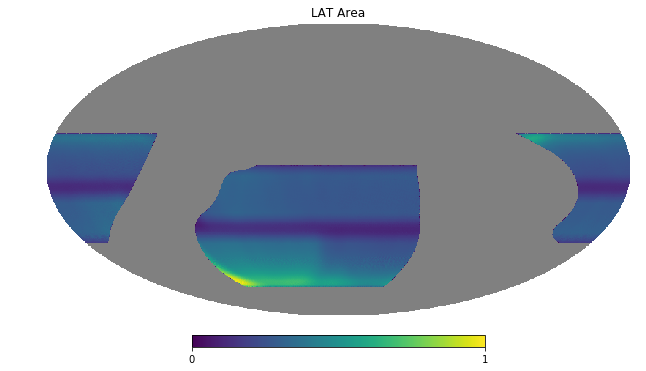

In [17]:
hp.mollview(Hla*Mla,min=0,max=1,title='LAT Area')
savefig('fig_window_LAT.pdf')

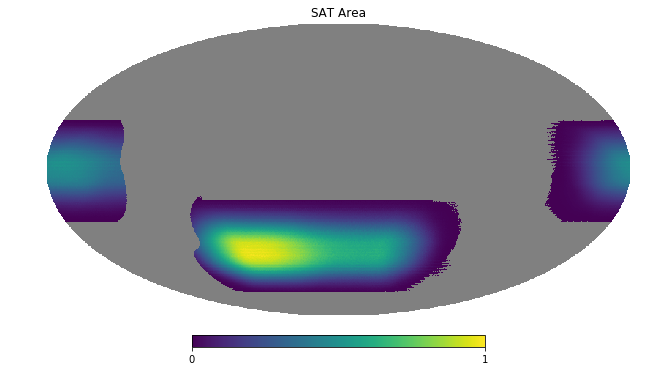

In [18]:
hp.mollview(Hsa*Msa,min=0,max=1,title='SAT Area')
savefig('fig_window_SAT.pdf')